# ASSIGNMENT 9 : PCA

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Exploratory Data Analysis (EDA):

In [4]:
#Loading the dataset
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\9. PCA\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.isnull().sum().sum()

0

No null values we can move further.

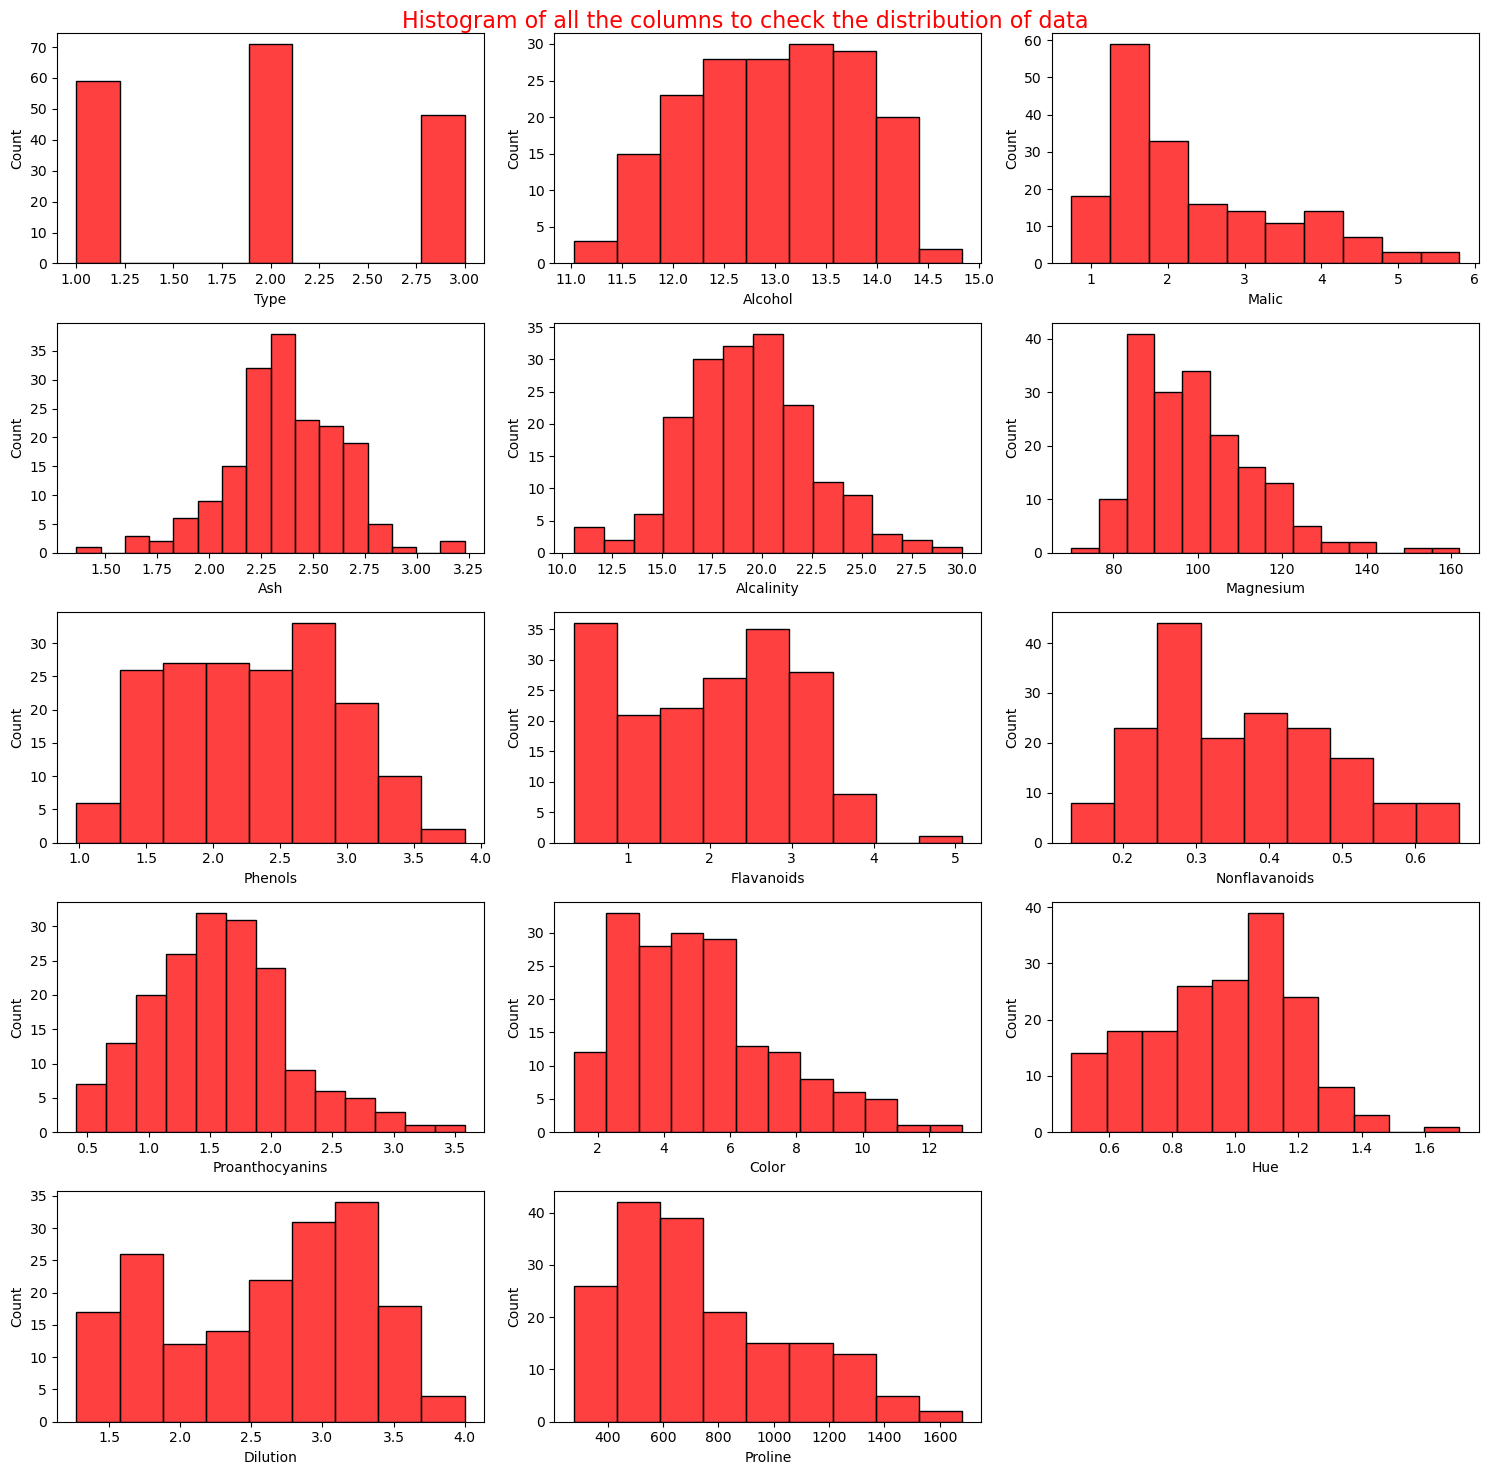

In [10]:
# Let's Check for distribution of data
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(5, 3, index)       #creating subplot
    sns.histplot(x=df[col], color='red')         # creating hist plot inside each subplot
    index += 1                     #increse the index
plt.suptitle("Histogram of all the columns to check the distribution of data", size=16, color ='red')  #setting super title
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* We have few columns like malic, alcalinity, magnesium, nonflavanoids, proanthocyanins, color, hue, proline seems positive skewed.
* We also have few columns like ash, dilution appearing to be negatively skewed.

In [12]:
#Checking the skewness for confirmation
for col in df.columns:
    print(f'{col} : {df[col].skew()}')

Type : 0.10743112358094281
Alcohol : -0.051482331077134784
Malic : 1.0396511925814442
Ash : -0.17669931645735712
Alcalinity : 0.21304688642645586
Magnesium : 1.098191054755161
Phenols : 0.08663858640245253
Flavanoids : 0.02534355338149103
Nonflavanoids : 0.4501513355621236
Proanthocyanins : 0.5171371722998975
Color : 0.8685847909572548
Hue : 0.021091272199709302
Dilution : -0.30728549895848106
Proline : 0.7678217813897322


This proved the above inferences.

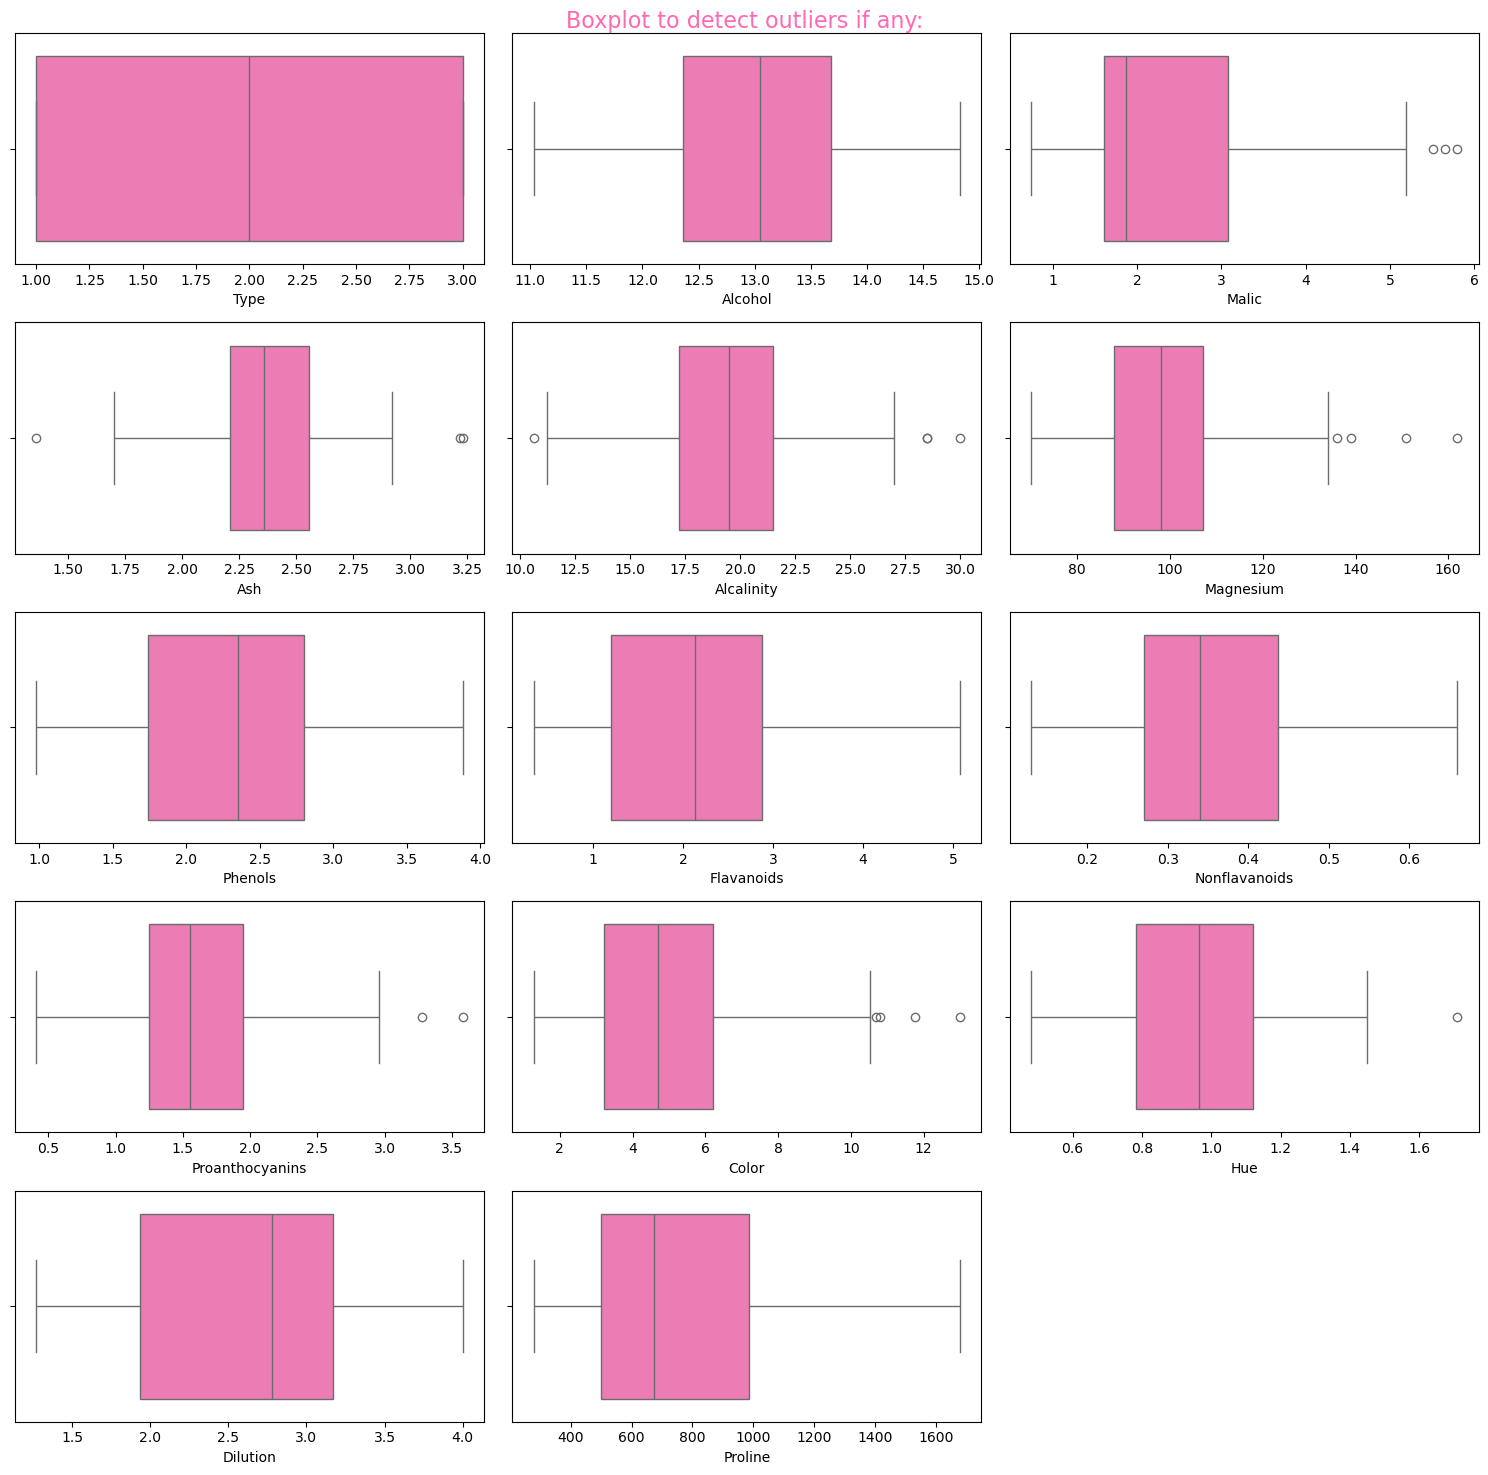

In [14]:
# Let's Check for outliers if any
df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(5, 3, index)       #creating subplot
    sns.boxplot(x=df[col], color= 'hotpink')         # creating box plot inside each subplot
    index += 1                     #increse the index
plt.suptitle("Boxplot to detect outliers if any:", size=16, color='hotpink')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* from all the above box pots we can see that almost half of the columns have outlier but they all have a very few number of them.

In [16]:
# Let's remove all the outliers from above boxplot
def remove_outliers(df, column):                                             #function to remove outliers
    Q1 = df[column].quantile(0.25)                                           #defining Q1 
    Q3 = df[column].quantile(0.75)                                           #defining Q3
    IQR = Q3 - Q1                                                            #defining IQR
    lower_bound = Q1 - 1.5 * IQR                                             #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR                                             #calculating upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]     #returning all the rows with lesser than lower bound and more than upper bound

print("Dataset size before removing outliers: ", df.shape)
for col in df.columns:                                                       # iterating through all the columns
    df = remove_outliers(df, col)                                            # calling the function
print("Dataset size after removing outliers: ", df.shape)

Dataset size before removing outliers:  (178, 14)
Dataset size after removing outliers:  (161, 14)


* After removal of outliers we are left with 161 rows

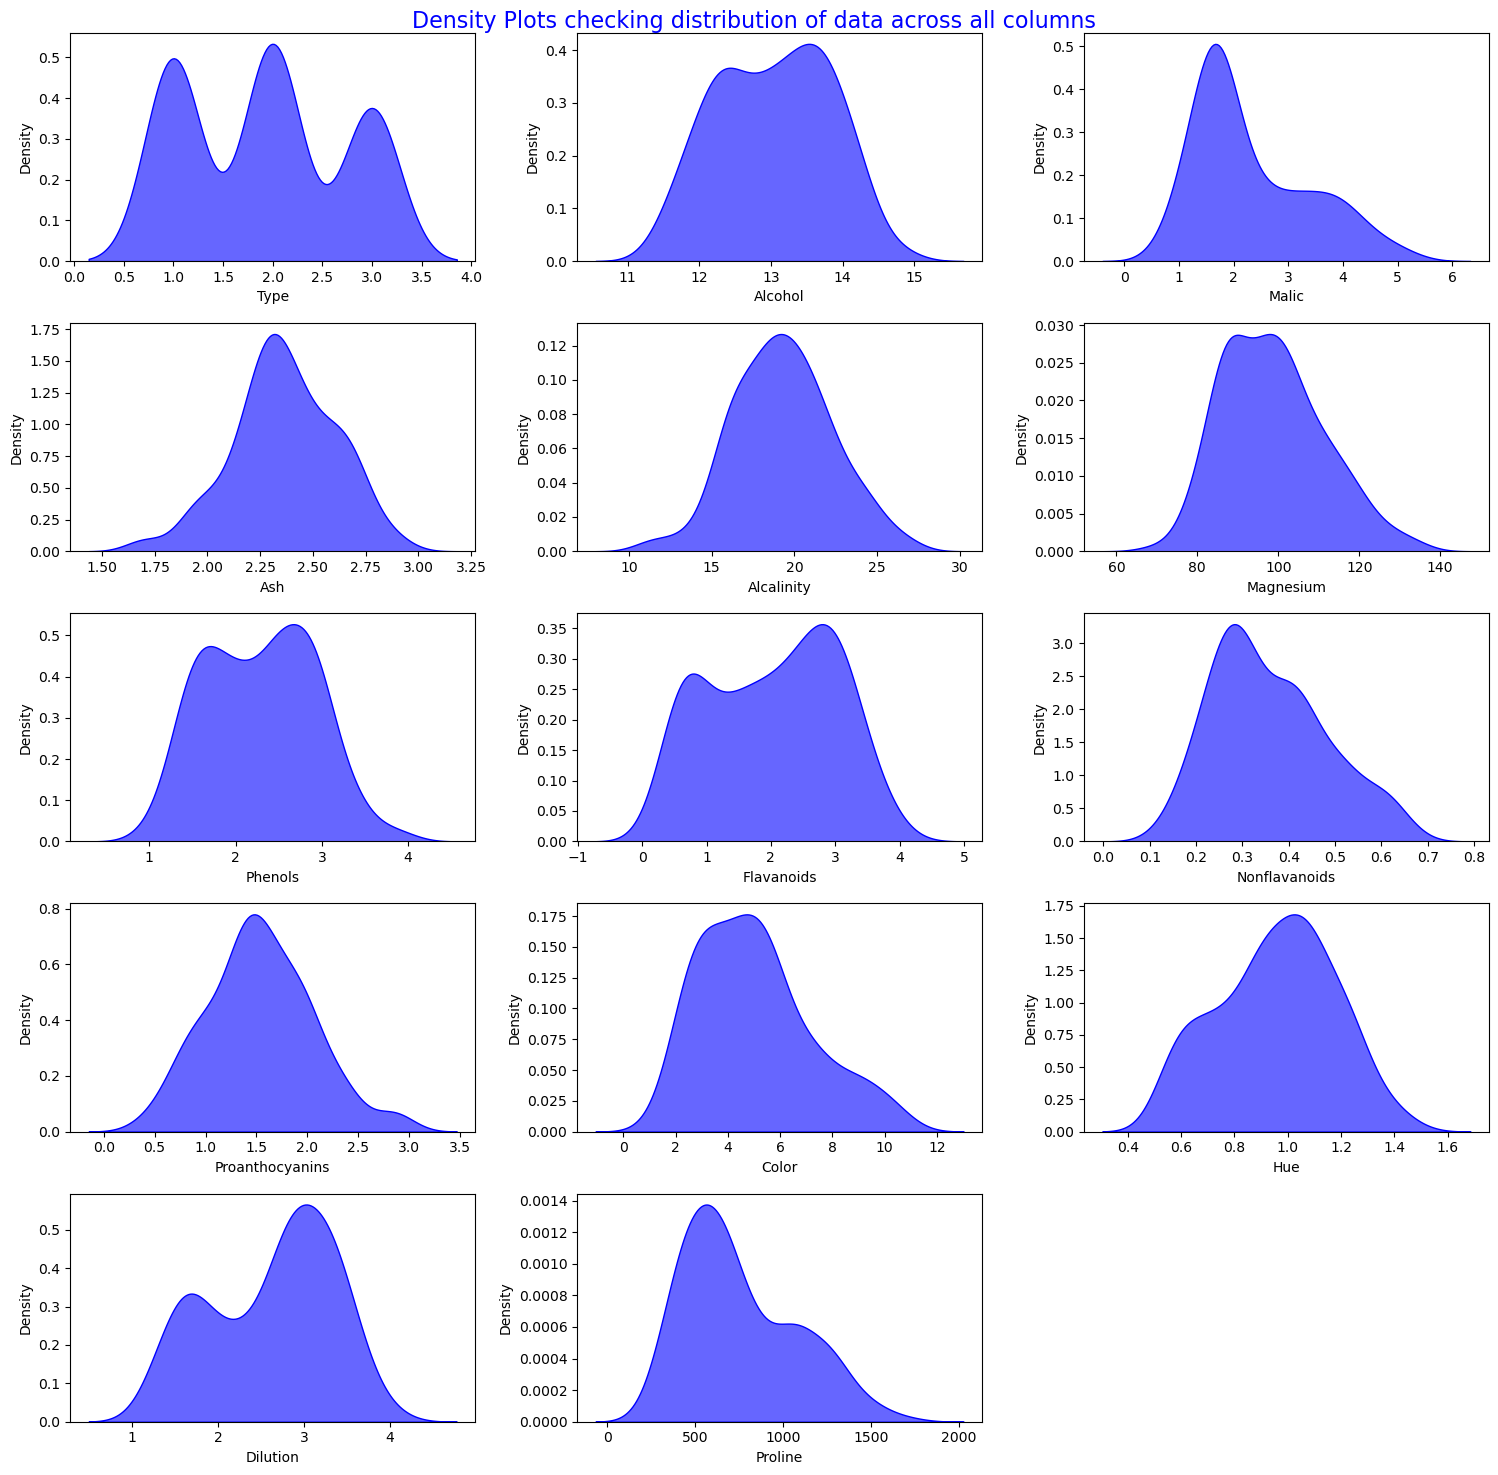

In [18]:
# Let's plot Density plot to understand the data better.

df_cols = df.columns               #column names in terms of list(just the index)
plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df_cols:                #looping through all the columns one by one
    plt.subplot(5, 3, index)       #creating subplot
    sns.kdeplot(data=df, x=col, fill=True, color="blue", alpha=0.6)         # creating density plot inside each subplot 
    index += 1                     #increse the index for subplot
plt.suptitle("Density Plots checking distribution of data across all columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* Many of the Columns are unimodal.
* Few of the columns appears to be binomial.
* One one column (type) seems to be multinomial.

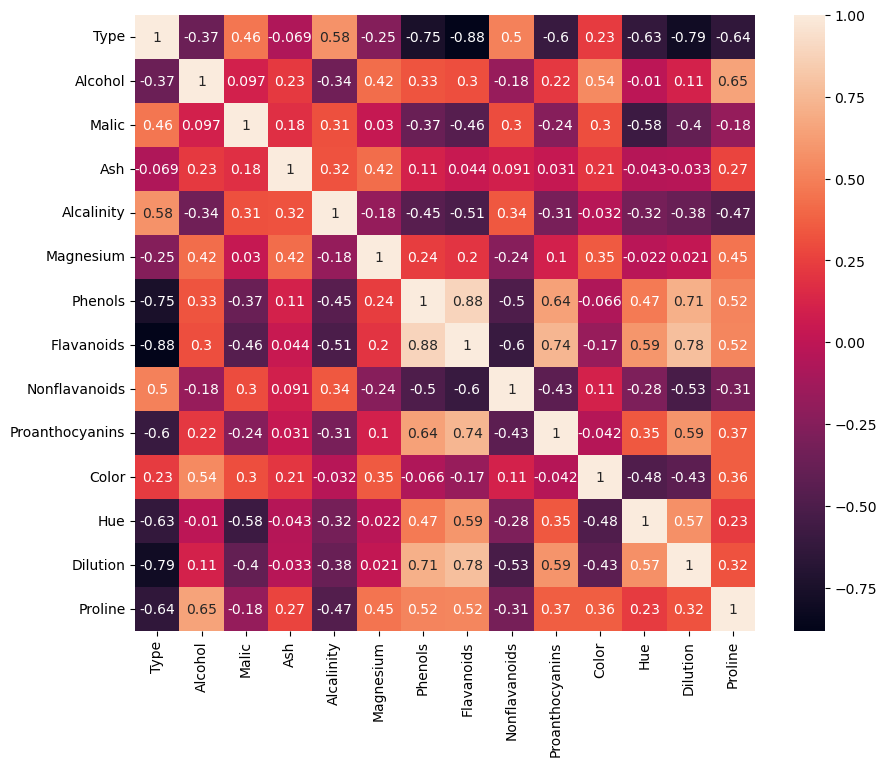

In [20]:
#Let's check for corelation between all the columns.
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

* We infer that Flavanoids and Phenols seems to be highly correlated, we can handle this by removing one of the columns.
* For this we will be removing Flavanoids
* We can also observe that many of the columns are negatively correlated

In [22]:
df.drop('Flavanoids', axis=1, inplace=True)      #removed Flavanoids

In [23]:
#feaure extraction, since it is an unsupervised ML algorithm we only have features and no target variable
x = df.values
x

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

#### Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [26]:
# we'll be using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                # calling the Scaler function
x_scaled = scaler.fit_transform(x)       # x_scaled is the scaled value 
print(x_scaled.mean())                   # checking the mean value of x
print(x_scaled.std())                    # checking standard deviation of x 

3.1911618328451704e-16
1.0


We can see the mean value is very close to 0 and standard deviation is 1, so we'll be going ahead with this.

In [28]:
#lets plot Scree plot and Cumulative Explained Variance to gauge the best number of components.
from sklearn.decomposition import PCA

#PCA building 
pca = PCA()
pca.fit(x_scaled)

PCA()

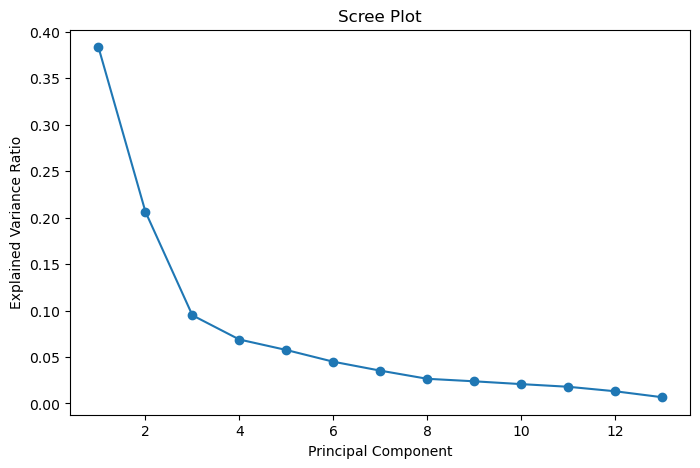

In [29]:
# Scree Plot from PCA tp find out optimul number of Principal Components

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

Based on the Scree plot we should be taking 3 Principal Components.

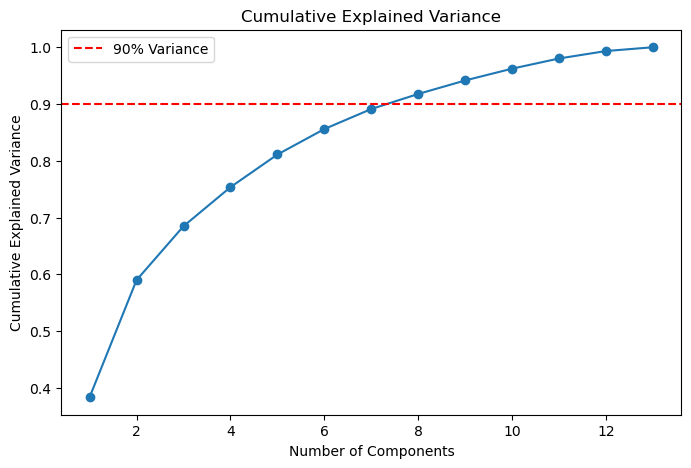

In [31]:
# Cumulative Explained Variance

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

* Here we can observe that after 3 components the variance is decreasing just 10%
* With only 3 principal component we are able to gauge 70% of the data.
* So in this example **we will be assuming** the best number of principal component to be **3**

In [33]:
# Based on above graphs we are assuming that the best number of principal component is 3
n_component = 3
pca = PCA(n_components=n_component)
pca

PCA(n_components=3)

In [34]:
x_pca_transformed = pca.fit_transform(x_scaled)            

# x is the original data
# x_scaled is the scaled data
# x_pca_transformed is the pca transformed data

In [35]:
# Let's see the difference between x and Pca transformed data
print(x)
print()
print(x_pca_transformed)

[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

[[-3.57674759e+00  1.56018662e+00  6.93042982e-02]
 [-2.54996257e+00 -3.75408909e-01 -1.90370538e+00]
 [-2.61443705e+00  9.17138098e-01  1.08524290e+00]
 [-3.79721976e+00  2.67453801e+00 -1.88406657e-01]
 [-1.24220358e+00  1.06451285e+00  2.47682610e+00]
 [-3.17915113e+00  2.09635109e+00 -5.31717918e-01]
 [-2.94397140e+00  1.00278789e+00 -7.28133494e-01]
 [-2.45512017e+00  1.77552728e+00  7.33992448e-01]
 [-2.83312319e+00  7.25672833e-01 -1.76829958e+00]
 [-2.89619223e+00  6.21509637e-01 -1.06177709e+00]
 [-3.57233868e+00  1.14397756e+00 -2.60313067e-01]
 [-2.21544170e+00  4.61527288e

* Above we can observe the original and transformed data.

#### Task 3: Clustering with Original Data:

In [38]:
#Applying KMeans using the original dataset(scaled using standard scaler)
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state =42)   # using default kmeans model
    kmeans.fit(x_scaled)                                                 # x_scaled is our original data which is standardized 
    wcss.append(kmeans.inertia_)

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

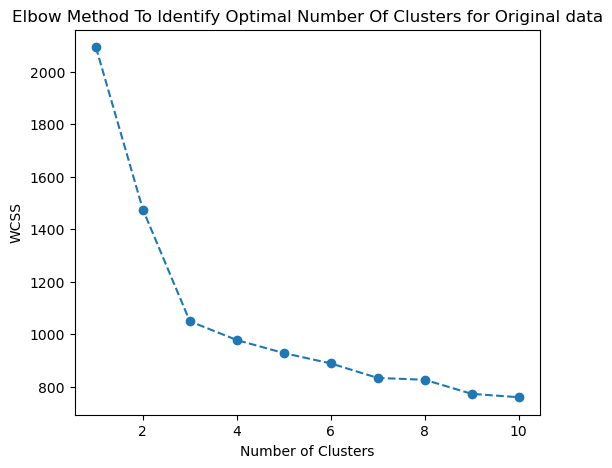

In [39]:
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method To Identify Optimal Number Of Clusters for Original data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* 3 seems to be the most optimum number of clusters for Original Data set

In [41]:
# 3 seems to be the most appropriate number for this
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_scaled)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
org_data_cluster_centers = kmeans.cluster_centers_
org_data_cluster_centers

array([[ 0.11101326, -0.942079  , -0.43283446, -0.47266207,  0.25668523,
        -0.60990054, -0.08495612,  0.03563128, -0.01124037, -0.91718723,
         0.44532319,  0.24178847, -0.79166005],
       [ 1.35865091,  0.11689043,  0.96739732,  0.22099038,  0.66131869,
         0.04418924, -1.0315642 ,  0.72120791, -0.84856103,  0.95286025,
        -1.2139719 , -1.31324487, -0.38973532],
       [-1.16563922,  0.90143089, -0.29114763,  0.32694995, -0.7806866 ,
         0.60788958,  0.88572266, -0.59422851,  0.66686153,  0.229919  ,
         0.46833986,  0.7592187 ,  1.13417469]])

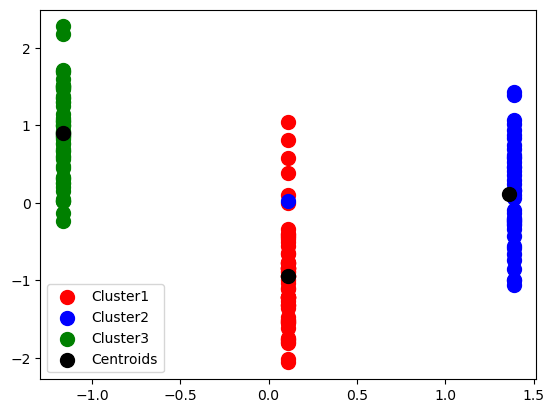

In [43]:
#plotting with original dataset of Kmeans
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')      # plotting first cluster
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')     # plotting second cluster 
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')    # plotting third cluster 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')  #plotting the centroids

plt.legend()
plt.show()

* from the original data scatterplot it is clear that we can expect 3 clusters.

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
sil_score = silhouette_score(x_scaled, labels)
dbi = davies_bouldin_score(x_scaled, labels)
print("Silhouette Score of KMeans using Original data : ",sil_score)
print("Davies-Bouldin Index of KMeans using Original data : ",dbi)

Silhouette Score of KMeans using Original data :  0.3179569711817949
Davies-Bouldin Index of KMeans using Original data :  1.262110424940684


* Judging from the Silhouette score and Davies-Bouldin Index scores of 0.3179 and 1.2621 respectively.
* We can say that the formed clusters is acceptable but not optimum.

#### Task 4: Clustering with PCA Data:

In [48]:
# Let's use pca transformed data stored in x_transformed
#Applying KMeans to the PCA Transformed dataset.
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state =42)
    kmeans.fit(x_pca_transformed)      # x_pca_transformed is our PCA Transformed data
    wcss.append(kmeans.inertia_)

C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

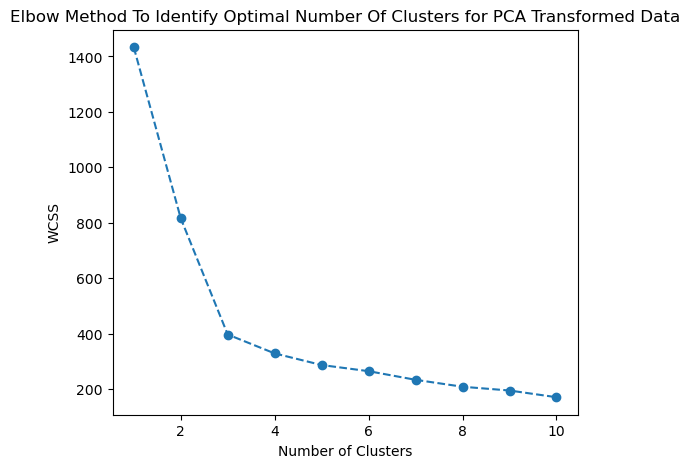

In [49]:
# plotting elbow graph to get the optimum number of clusters

plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method To Identify Optimal Number Of Clusters for PCA Transformed Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From elbow method 3 seems to be the most appropriate numrber of clusters to be formed.

In [51]:
# 3 seems to be the most appropriate number for this
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 42)        #building Kmeans with 3 clusters
y_kmeans = kmeans.fit_predict(x_pca_transformed)                            #predicting the values
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\peros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
# getting cluster centers
pca_data_cluster_centers = kmeans.cluster_centers_             # getting cluster center of pca transformed data
pca_data_cluster_centers

array([[ 0.27680259, -1.82606033,  0.19858353],
       [ 2.83590997,  1.30751057, -0.23185249],
       [-2.48049463,  0.91286237, -0.03006145]])

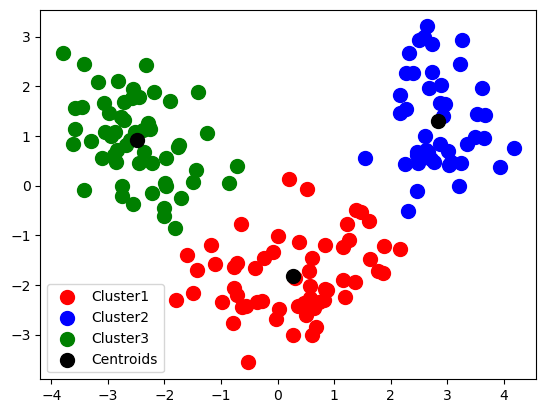

In [53]:
#let's plot PCA transformed data with KMeans
plt.scatter(x_pca_transformed[y_kmeans == 0, 0], x_pca_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')       #plotting first cluster
plt.scatter(x_pca_transformed[y_kmeans == 1, 0], x_pca_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')      #plotting second cluster
plt.scatter(x_pca_transformed[y_kmeans == 2, 0], x_pca_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')     # plotting third cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')                #plotting cluster centers
 
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_                                                # getting Labels
sil_score = silhouette_score(x_pca_transformed, labels)                # getting silhouette score 
dbi = davies_bouldin_score(x_pca_transformed, labels)                  # getting DBI score
print("Silhouette Score of KMeans using Original data : ",sil_score)
print("Davies-Bouldin Index of KMeans using Original data : ",dbi)

Silhouette Score of KMeans using Original data :  0.503111237812412
Davies-Bouldin Index of KMeans using Original data :  0.7465777408182802


#### Task 5: Comparison and Analysis:

**Let's check cluster centers**
* **Original Data cluster center features:** 
1. [ 0.11101326, -0.942079  , -0.43283446, -0.47266207,  0.25668523,
        -0.60990054, -0.08495612,  0.03563128, -0.01124037, -0.91718723,
         0.44532319,  0.24178847, -0.79166005]
2. [ 1.35865091,  0.11689043,  0.96739732,  0.22099038,  0.66131869,
         0.04418924, -1.0315642 ,  0.72120791, -0.84856103,  0.95286025,
        -1.2139719 , -1.31324487, -0.38973532]
3. [-1.16563922,  0.90143089, -0.29114763,  0.32694995, -0.7806866 ,
         0.60788958,  0.88572266, -0.59422851,  0.66686153,  0.229919  ,
         0.46833986,  0.7592187 ,  1.13417469]

* **Transformed Data cluster center features:**
1. [ 0.27680259, -1.82606033,  0.19858353]
2. [ 2.83590997,  1.30751057, -0.23185249]
3. [-2.48049463,  0.91286237, -0.03006145]


* Those numbers in each cluster represent the features of each cluster points
* We can see that the features taken for original data is obviously more than transformed data, in original we took all the features but in transformed we took only 3 main important features.
* In the original the clusters points are assigned considering all the feature values but in transformed data the clusters are assigned by only considering 3 features.
* We can also see that the cluster centers formed for original and transformed data is differnt but they are quite close to each other.

**Let's compare Silhouette Score and Davies-Bouldin Index for both the cases.**

* **Original Data :**
1. Silhouette Score of KMeans using Original data :  0.3179569711817949
2. Davies-Bouldin Index of KMeans using Original data :  1.262110424940684
* **Transformed Data :**
1. Silhouette Score of KMeans using Original data :  0.503111237812412
2. Davies-Bouldin Index of KMeans using Original data :  0.7465777408182802

* We can see from both the scores that the quality of clusters using Transformed data is much better than Original Data
(Silhouette Score more the better, Davies-Bouldin Index lesser the better)

Similarities :

* PCA often retains the dominant structure of the data since both recommended the same number of cluster centers.
* They both provide similar cluster points or almost close distant cluster points

Differences :

* There might be slight alter in cluster boundaries since the loss of varience in lower principal components.
* Clusters could become smaller since they use only few principal components.
* High dimentional data usually make clusters with higher noise, while PCA reduces noise to a certain extent.

**Impact of dimensionality reduction on clustering performance**

**Positive Impacts:**
* Better efficiency since it takes fewer features.
* Noise reduction
* Better interpretation of Clusters

**Negative Impacts:**
* Information loss because we lose few features
* Clusters might be a bit distorted(out of place of natural state).


**Analyze the trade-offs between using PCA and clustering directly on the original dataset**

**Original Data:**
* Handles all the original features
* Could Overfit potentially
* Slower speed
* Could entertain noise because of irrelevant or less relevant features
* Original feature space remains the same
* May struggle with irrelevant features
* Highly accurate for clean, low dimentional data.

**PCA Transformed Data:**
* Reduces to key features only
* Less chances of Overfitting
* Faster due to reduced dimentionality.
* Reduces noise, focusing on major variance
* Could complicate interpretation due to scaled feature
* Improve compactness and separation of clusters
* Best suited for high-dimentional noisy data set.

#### **Task 6: Conclusion and Insights**

**Key Findings(Summarize)** 

* Many of the features were left skewed and only a few were right skewed.
* This dataset had only a few number of outliers.
* Most of the features were unimodal and only one feature was multimodal.
* only one Column was highly correlated so we removed it
* Based on Scree plot and Cumulative explained variance we took principal components to be 3
* The original data has around   features where as PCA transformed data had only 3 main principal component
* Based on Elbow method for both original and transformed data we decided that the optimum number of clusters would be 3.
* The distribution of Original data in KMeans was a bit overlapped (only 1 or 2 datapoints)
* The distribution of PCA Transformed data did not have any overlapping issue.
* The Silhouette Score and Davies-Bouldin Index score was better for PCA Transformed data model comparatively.

**2. Discuss the practical implications of using PCA and clustering in data analysis.**

We are aware that to determine something as result not every feature provides equal weigtage to the solution so that is where the PCA helps us a lot to determine the weight of each column to retain only the columns which has high weightage towards the solution.

* Datasets with high dimentions are best suited here. All we have to do is determine the most important features and implement any unsupervised machine learning model.
* Reduces Noise and redundant features which provides small contribution to the output.
* Visualization better due to less number of components.
* We can griup customers based on behaviour allows for targeted marketing.
* Imporves clustering quality, we saw that using silhouette score
* Practical Applications include Biology, genetics, image compression, recommended systems.

**3. Providing recommendations for when to use each technique based on the analysis conducted.**

* **The best condition to use PCA** would be when we have high dimention data, which is noisy and difficult to clean completely
* **We shouldn't be using PCA** when we have smaller dataset with less number of features and clean data, also when all the features contribute equally to the result.